In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
from astropy.io import ascii
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from astropy import constants as const
from numpy import random as ran
%matplotlib inline

In [47]:
tau_matrix = HI_bootstrap(5000,"lowz")

In [48]:
tau, z = HI_opacity("lowz")

In [49]:
N = 10

N_matrix = np.array([tau_matrix[i] - tau for i in range(N)])

tranpose = np.transpose(N_matrix)  # matrix math

covariance = np.dot(tranpose, N_matrix)

sigma = np.sqrt(np.diagonal(covariance) / (N - 1)) 

In [50]:
sigma

array([0.08114411, 0.04010344, 0.06349829, 0.04947387, 0.08029277,
       0.05674998, 0.04894121, 0.08352824, 0.07011855, 0.1521847 ,
       0.07736495, 0.08233225, 0.06591889, 0.06516776, 0.06870988,
       0.09075977, 0.06922642, 0.12827309, 0.09450421, 0.05622544,
       0.06875337, 0.05910142, 0.07888451, 0.07455007, 0.05420871,
       0.05720089, 0.02121947, 0.08799554, 0.07860912, 0.07426785,
       0.05529079, 0.07320978, 0.0727902 , 0.07429721, 0.04559689,
       0.04050299, 0.10460108, 0.07066462, 0.05396561, 0.05085863,
       0.05554023, 0.05016543, 0.06317179, 0.0592951 , 0.02801565,
       0.06631246, 0.03654254, 0.04465758])

In [32]:
for i in range(len(sigma)):
    
    if np.isnan(sigma[i]):
        
        sigma[i] = (np.nanstd(tau_mat[:,i]))

In [17]:
#for i in range(48):
    
#    col_test = tau_mat[:,i]
    
#    med_test = np.nanmedian(col_test)
#    std_test = np.nanstd(col_test)

#    plt.hist(col_test,bins=15)
#    plt.vlines(med_test+std_test, 0,8)
#    plt.vlines(med_test-std_test, 0,8)
#    plt.vlines(med_test,0,10,color="red")
#    plt.vlines(tau[i],0,10,color="gold")
#    plt.show()

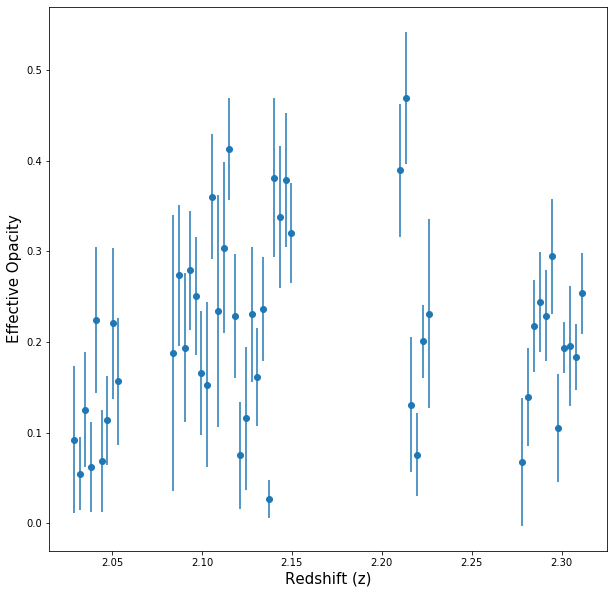

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.errorbar(z, tau, yerr=sigma, fmt="o")
plt.xlabel("Redshift (z)", fontsize = 15)
plt.ylabel("Effective Opacity", fontsize = 15)
plt.show()